In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

# keras dataset(MNIST-->Hand written)
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [6]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
type(X_train)

numpy.ndarray

In [8]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
print(X_train[15].shape)
print(X_train[15])

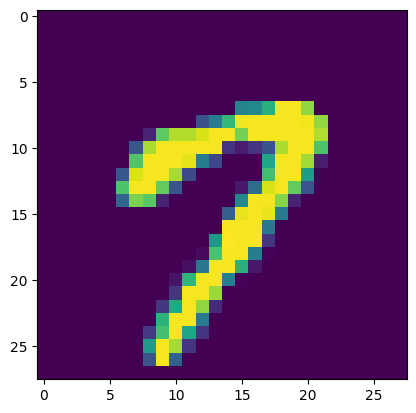

2


In [12]:
plt.imshow(X_train[15])
plt.show()

print(Y_train[25])

**Unique values**

In [15]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Scaled using max range of colour

In [16]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_train[5])

In [20]:
X_train[5].shape

(28, 28)

**Building Neural Network**

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(20, activation ='relu'),
    keras.layers.Dense(50, activation ='relu'),
    keras.layers.Dense(10, activation ='sigmoid')
])

In [23]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

**Accuracy on train data**

In [24]:
model.fit(X_train, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8026 - loss: 0.6655 - val_accuracy: 0.9478 - val_loss: 0.1838
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9383 - loss: 0.2139 - val_accuracy: 0.9602 - val_loss: 0.1474
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9511 - loss: 0.1696 - val_accuracy: 0.9633 - val_loss: 0.1340
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9573 - loss: 0.1457 - val_accuracy: 0.9658 - val_loss: 0.1270
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9617 - loss: 0.1296 - val_accuracy: 0.9662 - val_loss: 0.1250
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9655 - loss: 0.1179 - val_accuracy: 0.9675 - val_loss: 0.1256
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9678 - loss: 0.1090 - val_accuracy: 0.9675 - val_loss: 0.1276
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9697 - loss: 0.1014 - 

** Accuracy on test data**

In [25]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9542 - loss: 0.1557


In [26]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [29]:
print(Y_pred[0])

[2.3777148e-04 4.1334373e-05 2.0383157e-01 7.2230047e-01 3.3571740e-07
 1.8087245e-03 1.5693669e-11 9.9925131e-01 1.9578066e-02 4.6025869e-01]


In [30]:
Y_pred_label = [np.argmax(i) for i in Y_pred]
print(Y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 4, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 3, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [31]:
conf_matrix = confusion_matrix(Y_pred_label, Y_test)

In [32]:
print(conf_matrix)

tf.Tensor(
[[ 958    0    7    0    1    2    3    2    3    3]
 [   0 1106    2    0    0    0    2    5    0    3]
 [   1    3  971    6    1    1    7   10    3    0]
 [   2    4   19  970    0   10    1   10   24    8]
 [   1    1   10    1  949    2   12    1    7   12]
 [   3    1    1   15    1  859   13    0   15   14]
 [   6    2    3    0    5    4  913    0    1    0]
 [   2    2    8    5    3    3    0  988    5    7]
 [   4   16    8   12    2    6    7    3  912    2]
 [   3    0    3    1   20    5    0    9    4  960]], shape=(10, 10), dtype=int32)


Text(0.5, 80.7222222222222, 'Predicted Labels')

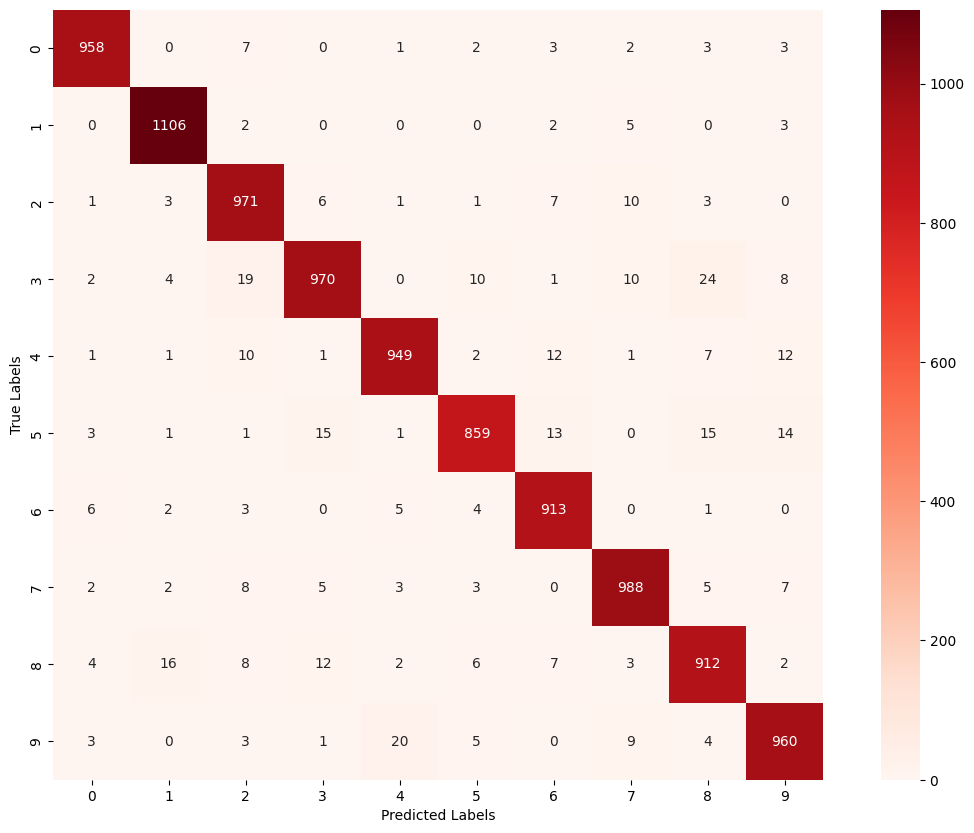

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(conf_matrix, annot=True, square=True, cbar=True, fmt='d', cmap='Reds')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**Predictive System**

Path of the image to be predicted: /content/images (1).jpeg


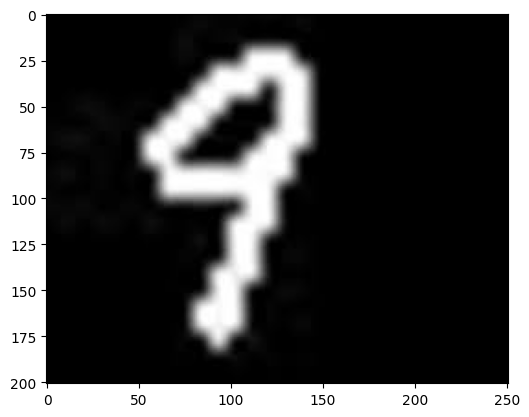

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The Handwritten Digit is recognised as  8


In [46]:
input_image_path = input('Path of the image to be predicted: ')

input_image = mpimg.imread(input_image_path)

plt.imshow(input_image)
plt.show()

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)